In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants
from scipy.integrate import quad
au_to_m = 1.49e11
%matplotlib inline 

In [2]:
pc_to_m = 3.086e16

In [3]:
def L2F(L, radius):
    return L / ( 4. * np.pi * radius**2 )

In [71]:
# Flux function

def dnr_dF(Flux, *args):

    radius, alpha, F_min, F_max = args

#    F_min = L2F( L_min, radius )
#    F_max = L2F( L_max, radius )

    if (Flux < F_min):
        rslt = 0.
    elif(Flux <= F_max):
        rslt = Flux**(-1.*alpha) * radius**(4. - 2.*alpha)
    else: 
        rslt = 0.

    return rslt

In [74]:
# normalize a function

def make_normalizedfunc(func, llimit, ulimit, *args):

    norm = quad( func, llimit, ulimit, args=args )[0]

    def func_normalized(x, *args):
#       print "radius", radius, "norm", norm
        return func(x, *args) / norm
    
    return func_normalized
    

In [135]:
# given probabilty function, compute the expected value for the maximum value

def expected_max( func_prob, llimit, ulimit, totalnum, *args ):
    
    X_GRID = 2000
    X_grid = np.logspace( np.log10(llimit), np.log10(ulimit), X_GRID)
    logX_grid = np.log(X_grid)
    
    # probability for a target to have a value between X and X + dX
    P_grid = np.zeros(X_GRID)
    for ii in xrange(X_GRID):
        P_grid[ii] = func_prob( X_grid[ii], *args )
        
    # probability for a target to have a value less than X
    P_less_grid = np.zeros(X_GRID)
    for ii in xrange(1,X_GRID):
        P_less_grid[ii] = quad( func_prob, llimit, X_grid[ii], args=args )[0]
    
    # probability that maximum flux is X 
    totalprob_grid = totalnum * P_grid * P_less_grid**( totalnum - 1 )
    
    # expected value
    expected_value = np.trapz( X_grid * totalprob_grid * X_grid, x=logX_grid )
    
    return expected_value
                                                                

# Flux function at given radius

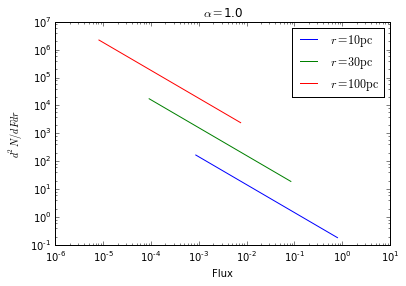

In [81]:
n_per_pc3 = 1e-3 # /pc^3
alpha = 1.0
L_min = 1.0
L_max = 1000.0

N_GRID_F = 401
F_grid = np.logspace(-10,5,N_GRID_F)
logF_grid = np.log(F_grid)

R_grid = np.array([10, 30, 100])
Prob_grid = np.zeros([3,N_GRID_F])

for nn in xrange(len(R_grid)):
#for nn in xrange(3,4):

    radius = R_grid[nn]
    F_min = L2F(L_min, radius)
    F_max = L2F(L_max, radius)
    args = (radius, alpha, F_min, F_max)
    
    func_prob = make_normalizedfunc(dnr_dF, F_min, F_max, *args)
    N_R = int( 4.0 * np.pi * R_grid[nn]**2 * n_per_pc3 )

    for ii in xrange(N_GRID_F):
        Prob_grid[nn][ii] = N_R * func_prob(F_grid[ii], *args)

### PLOT ###
plt.xlabel(r"Flux")
#plt.ylabel("flux distribution of targets within unit width at radius $r$")
plt.ylabel("$d^2N/dFdr$")
plt1 = plt.loglog(F_grid, Prob_grid[0], label=r'$r=10{\rm pc}$')
plt2 = plt.loglog(F_grid, Prob_grid[1], label=r'$r=30{\rm pc}$')
plt3 = plt.loglog(F_grid, Prob_grid[2], label=r'$r=100{\rm pc}$')
plt.legend()
plt.title(r"$\alpha = $" + str(alpha))
plt.xlim(1e-6, 10)
#plt.ylim(1e-3, 10)
plt.savefig("Prob_alpha"+ str(alpha)+".pdf")

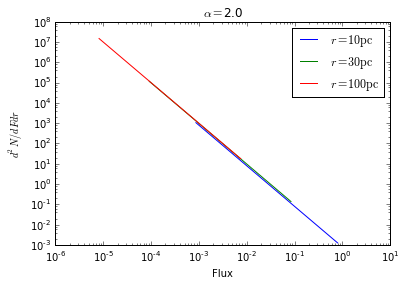

In [84]:
n_per_pc3 = 1e-3 # /pc^3
alpha = 2.0
L_min = 1.0
L_max = 1000.0

N_GRID_F = 401
F_grid = np.logspace(-10,5,N_GRID_F)
logF_grid = np.log(F_grid)

R_grid = np.array([10, 30, 100])
Prob_grid = np.zeros([3,N_GRID_F])

for nn in xrange(len(R_grid)):
#for nn in xrange(3,4):

    radius = R_grid[nn]
    F_min = L2F(L_min, radius)
    F_max = L2F(L_max, radius)
    args = (radius, alpha, F_min, F_max)
    
    func_prob = make_normalizedfunc(dnr_dF, F_min, F_max, *args)
    N_R = int( 4.0 * np.pi * R_grid[nn]**2 * n_per_pc3 )

    for ii in xrange(N_GRID_F):
        Prob_grid[nn][ii] = N_R * func_prob(F_grid[ii], *args)

### PLOT ###
plt.xlabel(r"Flux")
#plt.ylabel("flux distribution of targets within unit width at radius $r$")
plt.ylabel("$d^2N/dFdr$")
plt1 = plt.loglog(F_grid, Prob_grid[0], label=r'$r=10{\rm pc}$')
plt2 = plt.loglog(F_grid, Prob_grid[1], label=r'$r=30{\rm pc}$')
plt3 = plt.loglog(F_grid, Prob_grid[2], label=r'$r=100{\rm pc}$')
plt.legend()
plt.title(r"$\alpha = $" + str(alpha))
plt.xlim(1e-6, 10)
#plt.ylim(1e-3, 10)
plt.savefig("Prob_alpha"+ str(alpha)+".pdf")

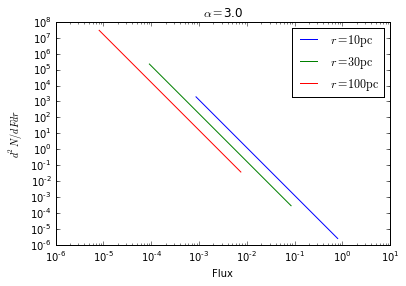

In [85]:
n_per_pc3 = 1e-3 # /pc^3
alpha = 3.0
L_min = 1.0
L_max = 1000.0

N_GRID_F = 401
F_grid = np.logspace(-10,5,N_GRID_F)
logF_grid = np.log(F_grid)

R_grid = np.array([10, 30, 100])
Prob_grid = np.zeros([3,N_GRID_F])

for nn in xrange(len(R_grid)):
#for nn in xrange(3,4):

    radius = R_grid[nn]
    F_min = L2F(L_min, radius)
    F_max = L2F(L_max, radius)
    args = (radius, alpha, F_min, F_max)
    
    func_prob = make_normalizedfunc(dnr_dF, F_min, F_max, *args)
    N_R = int( 4.0 * np.pi * R_grid[nn]**2 * n_per_pc3 )

    for ii in xrange(N_GRID_F):
        Prob_grid[nn][ii] = N_R * func_prob(F_grid[ii], *args)

### PLOT ###
plt.xlabel(r"Flux")
#plt.ylabel("flux distribution of targets within unit width at radius $r$")
plt.ylabel("$d^2N/dFdr$")
plt1 = plt.loglog(F_grid, Prob_grid[0], label=r'$r=10{\rm pc}$')
plt2 = plt.loglog(F_grid, Prob_grid[1], label=r'$r=30{\rm pc}$')
plt3 = plt.loglog(F_grid, Prob_grid[2], label=r'$r=100{\rm pc}$')
plt.legend()
plt.title(r"$\alpha = $" + str(alpha))
plt.xlim(1e-6, 10)
#plt.ylim(1e-3, 10)
plt.savefig("Prob_alpha"+ str(alpha)+".pdf")

# Distribution of Observed Flux within a sphere

# Expected Values

<function matplotlib.pyplot.show>

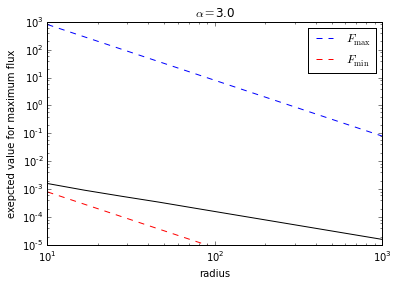

In [157]:
alpha = 3.0
L_min = 1.0
L_max = 1000000.0
n_per_pc3 = 1e-3 # /pc^3

N_GRID_R = 10
#R_grid = np.linspace(10, 300, N_GRID_R)
R_grid = np.logspace(1, 3, N_GRID_R)


Fmin = np.zeros(N_GRID_R)
Fmax = np.zeros(N_GRID_R)
expected_value = np.zeros(N_GRID_R)

##################################
for nn in xrange(N_GRID_R):

    radius = R_grid[nn]

    n_r = n_per_pc3 * ( 4. * np.pi * radius **2 )
    totalnum = int(n_r)
    
    if (totalnum >= 1):
        F_min = L2F(L_min, radius)
        F_max = L2F(L_max, radius)
        args = ( radius, alpha, F_min, F_max )
    
        func_prob = make_normalizedfunc(dnr_dF, F_min, F_max, *args)
        expected_value[nn] = expected_max( func_prob, F_min, F_max, totalnum, *args )
        Fmin[nn] =  L2F(L_min, radius)
        Fmax[nn] =  L2F(L_max, radius)
##################################

plt.xlabel("radius")
plt.ylabel("exepcted value for maximum flux")
plt1 = plt.plot(R_grid, expected_value, 'k-', label='')
plt2 = plt.plot(R_grid, Fmax, 'b--', label=r'$F_{\rm max}$')
plt3 = plt.plot(R_grid, Fmin, 'r--', label=r'$F_{\rm min}$')
plt.legend()
plt.title(r"$\alpha = $" + str(alpha))
plt.xscale("log")
plt.yscale("log")
#plt.ylim(1e-5, 1)
#plt.ylim(1e-2, 100)
plt.ylim(1e-5, 1e3)
plt.savefig("expectedvalues_alpha-"+ str(int(alpha))+"_Lmin-"+str(int(L_min))+"_Lmax-"+str(int(L_max))+"_Npc3-"+str(n_per_pc3)+".pdf")
plt.show

In [ ]:
alpha = 2.0
L_min = 1.0
L_max = 1000000.0
n_per_pc3 = 1e-2 # /pc^3

N_GRID_R = 10
#R_grid = np.linspace(10, 300, N_GRID_R)
R_grid = np.logspace(1, 3, N_GRID_R)


Fmin = np.zeros(N_GRID_R)
Fmax = np.zeros(N_GRID_R)
expected_value = np.zeros(N_GRID_R)

##################################
for nn in xrange(N_GRID_R):

    radius = R_grid[nn]

    n_r = n_per_pc3 * ( 4. * np.pi * radius **2 )
    totalnum = int(n_r)
    
    if (totalnum >= 1):
        F_min = L2F(L_min, radius)
        F_max = L2F(L_max, radius)
        args = ( radius, alpha, F_min, F_max )
    
        func_prob = make_normalizedfunc(dnr_dF, F_min, F_max, *args)
        expected_value[nn] = expected_max( func_prob, F_min, F_max, totalnum, *args )
        Fmin[nn] =  L2F(L_min, radius)
        Fmax[nn] =  L2F(L_max, radius)
##################################

plt.xlabel("radius")
plt.ylabel("exepcted value for maximum flux")
plt1 = plt.plot(R_grid, expected_value, 'k-', label='')
plt2 = plt.plot(R_grid, Fmax, 'b--', label=r'$F_{\rm max}$')
plt3 = plt.plot(R_grid, Fmin, 'r--', label=r'$F_{\rm min}$')
plt.legend()
plt.title(r"$\alpha = $" + str(alpha))
plt.xscale("log")
plt.yscale("log")
#plt.ylim(1e-5, 1)
#plt.ylim(1e-2, 100)
plt.ylim(1e-5, 1e3)
plt.savefig("expectedvalues_alpha-"+ str(int(alpha))+"_Lmin-"+str(int(L_min))+"_Lmax-"+str(int(L_max))+"_Npc3-"+str(n_per_pc3)+".pdf")
plt.show

<function matplotlib.pyplot.show>

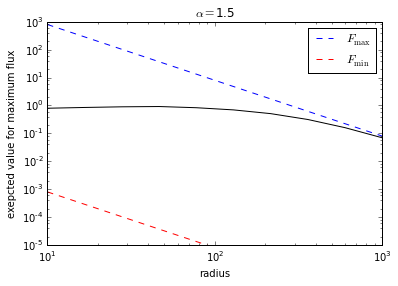

In [158]:
alpha = 1.5
L_min = 1.0
L_max = 1000000.0
n_per_pc3 = 1e-3 # /pc^3

N_GRID_R = 10
#R_grid = np.linspace(10, 300, N_GRID_R)
R_grid = np.logspace(1, 3, N_GRID_R)


Fmin = np.zeros(N_GRID_R)
Fmax = np.zeros(N_GRID_R)
expected_value = np.zeros(N_GRID_R)

##################################
for nn in xrange(N_GRID_R):

    radius = R_grid[nn]

    n_r = n_per_pc3 * ( 4. * np.pi * radius **2 )
    totalnum = int(n_r)
    
    if (totalnum >= 1):
        F_min = L2F(L_min, radius)
        F_max = L2F(L_max, radius)
        args = ( radius, alpha, F_min, F_max )
    
        func_prob = make_normalizedfunc(dnr_dF, F_min, F_max, *args)
        expected_value[nn] = expected_max( func_prob, F_min, F_max, totalnum, *args )
        Fmin[nn] =  L2F(L_min, radius)
        Fmax[nn] =  L2F(L_max, radius)
##################################

plt.xlabel("radius")
plt.ylabel("exepcted value for maximum flux")
plt1 = plt.plot(R_grid, expected_value, 'k-', label='')
plt2 = plt.plot(R_grid, Fmax, 'b--', label=r'$F_{\rm max}$')
plt3 = plt.plot(R_grid, Fmin, 'r--', label=r'$F_{\rm min}$')
plt.legend()
plt.title(r"$\alpha = $" + str(alpha))
plt.xscale("log")
plt.yscale("log")
#plt.ylim(1e-5, 1)
#plt.ylim(1e-2, 100)
plt.ylim(1e-5, 1e3)
plt.savefig("expectedvalues_alpha-"+ str(int(alpha))+"_Lmin-"+str(int(L_min))+"_Lmax-"+str(int(L_max))+"_Npc3-"+str(n_per_pc3)+".pdf")
plt.show

<function matplotlib.pyplot.show>

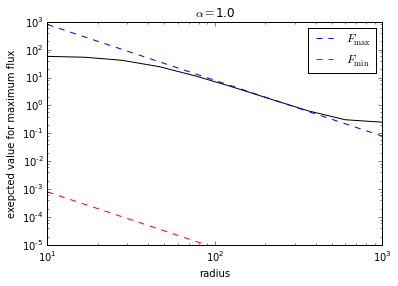

In [159]:
alpha = 1.0
L_min = 1.0
L_max = 1000000.0
n_per_pc3 = 1e-3 # /pc^3

N_GRID_R = 10
#R_grid = np.linspace(10, 300, N_GRID_R)
R_grid = np.logspace(1, 3, N_GRID_R)


Fmin = np.zeros(N_GRID_R)
Fmax = np.zeros(N_GRID_R)
expected_value = np.zeros(N_GRID_R)

##################################
for nn in xrange(N_GRID_R):

    radius = R_grid[nn]

    n_r = n_per_pc3 * ( 4. * np.pi * radius **2 )
    totalnum = int(n_r)
    
    if (totalnum >= 1):
        F_min = L2F(L_min, radius)
        F_max = L2F(L_max, radius)
        args = ( radius, alpha, F_min, F_max )
    
        func_prob = make_normalizedfunc(dnr_dF, F_min, F_max, *args)
        expected_value[nn] = expected_max( func_prob, F_min, F_max, totalnum, *args )
        Fmin[nn] =  L2F(L_min, radius)
        Fmax[nn] =  L2F(L_max, radius)
##################################

plt.xlabel("radius")
plt.ylabel("exepcted value for maximum flux")
plt1 = plt.plot(R_grid, expected_value, 'k-', label='')
plt2 = plt.plot(R_grid, Fmax, 'b--', label=r'$F_{\rm max}$')
plt3 = plt.plot(R_grid, Fmin, 'r--', label=r'$F_{\rm min}$')
plt.legend()
plt.title(r"$\alpha = $" + str(alpha))
plt.xscale("log")
plt.yscale("log")
plt.ylim(1e-5, 1e3)
#plt.ylim(1e-2, 100)
plt.savefig("expectedvalues_alpha-"+ str(int(alpha))+"_Lmin-"+str(int(L_min))+"_Lmax-"+str(int(L_max))+"_Npc3-"+str(n_per_pc3)+".pdf")
plt.show

<function matplotlib.pyplot.show>

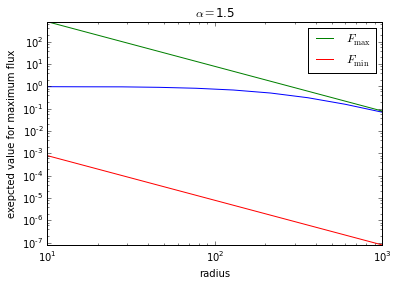

In [21]:
alpha = 1.5
L_min = 1.0
L_max = 1000000.0
n_per_pc3 = 1e-3 # /pc^3

N_GRID_R = 10
#R_grid = np.linspace(10, 300, N_GRID_R)
R_grid = np.logspace(1, 3, N_GRID_R)


Fmin = np.zeros(N_GRID_R)
Fmax = np.zeros(N_GRID_R)
expected_value = np.zeros(N_GRID_R)

##################################
for nn in xrange(N_GRID_R):

    radius = R_grid[nn]

    n_r = n_per_pc3 * ( 4. * np.pi * radius **2 )
#    print "n_r", n_r
    F_min = L2F(L_min, radius)
    F_max = L2F(L_max, radius)
    args = ( radius, alpha, F_min, F_max )
    
    func_prob = make_normalizedfunc(dnr_dF, F_min, F_max, *args)
    expected_value[nn] = expected_max( func_prob, F_min, F_max, n_r, *args )
    Fmin[nn] =  L2F(L_min, radius)
    Fmax[nn] =  L2F(L_max, radius)
##################################

plt.xlabel("radius")
plt.ylabel("exepcted value for maximum flux")
plt1 = plt.plot(R_grid, expected_value, label='')
plt2 = plt.plot(R_grid, Fmax, label=r'$F_{\rm max}$')
plt3 = plt.plot(R_grid, Fmin, label=r'$F_{\rm min}$')
plt.legend()
plt.title(r"$\alpha = $" + str(alpha))
plt.xscale("log")
plt.yscale("log")
plt.ylim(Fmin[-1], Fmax[0])
plt.show

<function matplotlib.pyplot.show>

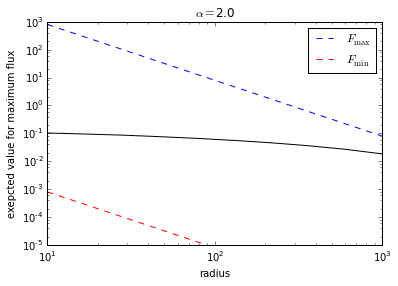

In [170]:
alpha = 2.0
L_min = 1.0
L_max = 1000000.0
n_per_pc3 = 1e-2 # /pc^3

N_GRID_R = 10
#R_grid = np.linspace(10, 300, N_GRID_R)
R_grid = np.logspace(1, 3, N_GRID_R)


Fmin = np.zeros(N_GRID_R)
Fmax = np.zeros(N_GRID_R)
expected_value = np.zeros(N_GRID_R)

##################################
for nn in xrange(N_GRID_R):

    radius = R_grid[nn]

    n_r = n_per_pc3 * ( 4. * np.pi * radius **2 )
    totalnum = int(n_r)
    
    if (totalnum >= 1):
        F_min = L2F(L_min, radius)
        F_max = L2F(L_max, radius)
        args = ( radius, alpha, F_min, F_max )
    
        func_prob = make_normalizedfunc(dnr_dF, F_min, F_max, *args)
        expected_value[nn] = expected_max( func_prob, F_min, F_max, totalnum, *args )
        Fmin[nn] =  L2F(L_min, radius)
        Fmax[nn] =  L2F(L_max, radius)
##################################

plt.xlabel("radius")
plt.ylabel("exepcted value for maximum flux")
plt1 = plt.plot(R_grid, expected_value, 'k-', label='')
plt2 = plt.plot(R_grid, Fmax, 'b--', label=r'$F_{\rm max}$')
plt3 = plt.plot(R_grid, Fmin, 'r--', label=r'$F_{\rm min}$')
plt.legend()
plt.title(r"$\alpha = $" + str(alpha))
plt.xscale("log")
plt.yscale("log")
plt.ylim(1e-5, 1e3)
#plt.ylim(1e-2, 100)
plt.savefig("expectedvalues_alpha-"+ str(int(alpha))+"_Lmin-"+str(int(L_min))+"_Lmax-"+str(int(L_max))+"_Npc3-"+str(n_per_pc3)+".pdf")
plt.show